## TMAC for Stokes Equations: BDM1-P0

This example is to show the rate of convergence of BDM1-P0 finite element approximation of the Stokes equations

$$- \Delta u + {\rm grad}\, p  = f \quad div u    = 0  \quad  \text{ in } \quad \Omega,$$

with the Dirichlet boundary condition:

$$u \cdot t    = g_t   \quad  u \cdot n   = g_n   \text{ in }\;  \Gamma.$$   

The bilinear form used in the discretization is not the standard one for Laplace operator but Hodge Laplace $-\Delta u = {\rm grad\, div}\, u + {\rm curl\, rot} u$

\begin{align}
({\rm rot}_h u_h, {\rm rot}_h v_h) +({\rm div} u_h, {\rm div} v_h).
\end{align}

The quantity $w_h = {\rm rot}_h u_h$ is an approximation of vorticity $w = {\rm rot} u$. Mass lumping is introduced in the computation of $w_h$ so that the formulation only involves $u_h$ and $p_h$. To use mass lumping for the quadratic element, a bubble function is introduced, so the velocity is BDM1b. 

In the error table, $(u_h,p_h)$ is the BDM1-P0 approximation of velocity and pressure. $u_I$ is the canonical edge interpolant of RT0 element and $p_I$ is the interpolant of p at the barycenter of each triangle. $w = {\rm rot} u$ is the vorticity, $w_h = {\rm rot}_hu_h$ is the numerical approximation and $w_I$ is the Lagrange interpolation of $w$ in P1 finite element space.

**References**:
- [Finite Element Methods For Stokes Equations](http://www.math.uci.edu/~chenlong/226/FEMStokes.pdf)
- [Convergence Analysis of The Triangular MAC Scheme for Stokes Equations](http://www.math.uci.edu/~chenlong/226/TMAC.html)

**Subroutines**:

    - StokesRT0
    - squareStokes
    - femStokesHdiv
    - StokesRT0femrate
    
The method is implemented in `StokesRT0` subroutine and can be tested in `squareStokes`. Together with other elements (BDM), `femStokesHdiv` provides a concise interface to solve Stokes equation using Hdiv elements. The BDM1b-P0 element is tested in `StokesRT0femrate`. This doc is also based on `StokesRT0femrate`.

See also
 
      StokesRT0femrate    

## (BDM1b,P0,P2) Element

The velocity is BDM1b element and the pressure is still P0 element. The vorticity is enriched to P2 element. 

We list the basis for RT0 below and refer to [PoissonBDM1femrate](PoissonBDM1femrate.html) for data structure. 

### Local bases of BDM1 element

Suppose `[i,j]` is the k-th edge. The two dimensional curl is a rotated graident defined as $\nabla^{\bot} f = (-\partial_y f, \partial _x f).$ For RT0, the basis of this edge along with its divergence are given by

$$ \phi_k = \lambda_i \nabla^{\bot} \lambda_j - \lambda_j \nabla^{\bot} \lambda_i. $$

For BDM1, one more basis is added on this edge

$$ \psi_k = \lambda_i \nabla^{\bot} \lambda_j + \lambda_j \nabla^{\bot} \lambda_i. $$


Inside one triangular, the 6 bases corresponding to 3 local edges `[2 3; 1 3; 1 2]` are:

$$ \phi_1 = \lambda_2 \nabla^{\bot} \lambda_3 - \lambda_3 \nabla^{\bot} \lambda_2, \quad  \psi_1 = \lambda_2 \nabla^{\bot} \lambda_3 + \lambda_3 \nabla^{\bot} \lambda_2.$$ 

$$ \phi_2 = \lambda_1 \nabla^{\bot} \lambda_3 - \lambda_3 \nabla^{\bot} \lambda_1, \quad  \psi_2 = \lambda_1 \nabla^{\bot} \lambda_3 + \lambda_3 \nabla^{\bot} \lambda_1. $$

$$ \phi_3 = \lambda_1 \nabla^{\bot} \lambda_2 - \lambda_2 \nabla^{\bot} \lambda_1, \quad  \psi_3 = \lambda_1 \nabla^{\bot} \lambda_2 + \lambda_2 \nabla^{\bot} \lambda_1. $$


Inside one triangle, we order the local bases in the following way: 

$$\{\phi_1,~\,\phi_2,~\,\phi_3,~\,\psi_1,~\,\psi_2,~\, \psi_3.\}$$

Note that $RT_0 \subset BDM_1$, and $\{ \phi_1,~\,\phi_2,~\,\phi_3 \}$ is the local bases for $RT_0$.

The first 3 dual bases are the line integral over orientated edges

$$l_i^{\phi}(u) = \int_{e_i} u \cdot n_i \, ds,$$

and the second 3 dual bases are

$$l_{ij}^{\psi}(u) = 3 \int_{e_{i, j}} u \cdot n_{i, j}\left(\lambda_{i}-\lambda_{j}\right) \, ds,$$

where $n_i = t_i^{\bot}$ is the rotation of the unit tangential vector of $e_i$ by $90^{\deg}$ counterclockwise.

It is straightforward to verify the "orthogonality":
$$l^{\phi}(\psi) = 0, \quad l^{\psi}(\phi) = 0, \quad l_i^{\phi}(\phi_j) = \delta_{ij}, \quad  l_i^{\psi}(\psi_j) = \delta_{ij}.$$

## Example 1: Unit square with bisection grids

#dof:    608,  #nnz:  15338, level:  3  MG WCYCLE iter: 25,  err = 7.1235e-09,  time = 0.093 s
#dof:   2496,  #nnz:  68522, level:  4  MG WCYCLE iter: 26,  err = 7.7215e-09,  time = 0.13 s
#dof:  10112,  #nnz: 288554, level:  5  MG WCYCLE iter: 26,  err = 9.0278e-09,  time = 0.49 s
#dof:  40704,  #nnz: 1183274, level:  6  MG WCYCLE iter: 26,  err = 8.5088e-09,  time =  1.9 s
Table: Error
 #Dof       h     ||u_I-u_h||_1   ||u-u_h||   ||u_I-u_h||_{max}

  672   1.25e-01   5.86459e-01   4.38331e-02   8.64378e-03
 2624   6.25e-02   2.83601e-01   1.08772e-02   1.22753e-03
10368   3.12e-02   1.39291e-01   2.70990e-03   1.63031e-04
41216   1.56e-02   6.90258e-02   6.76340e-04   2.09911e-05

 #Dof       h      ||p_I-p_h||    ||p-p_h||   ||p_I-p_h||_{max}||p_I - p^r_h||

  672   1.25e-01   1.13398e-01   1.39408e+00   4.65212e-01   6.01561e-01
 2624   6.25e-02   3.92539e-02   6.97704e-01   2.28238e-01   1.76040e-01
10368   3.12e-02   1.38100e-02   3.48805e-01   1.12543e-01   5.34677e-02
41216   

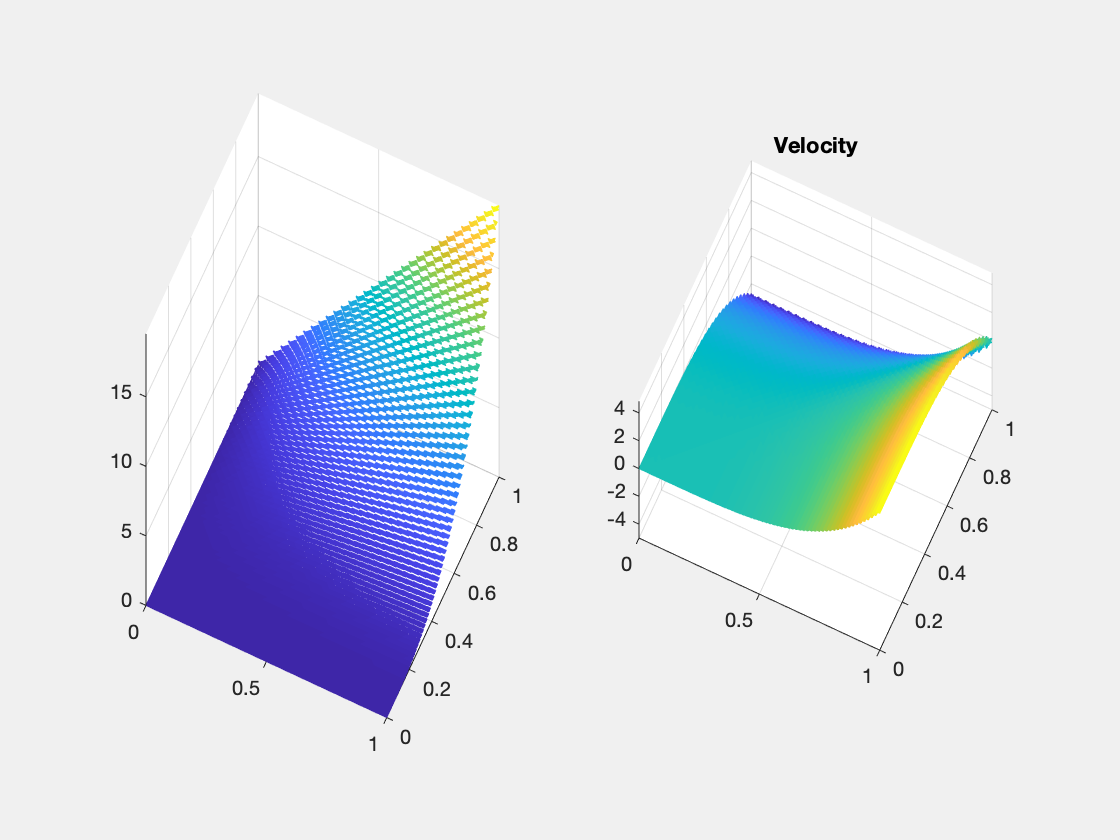

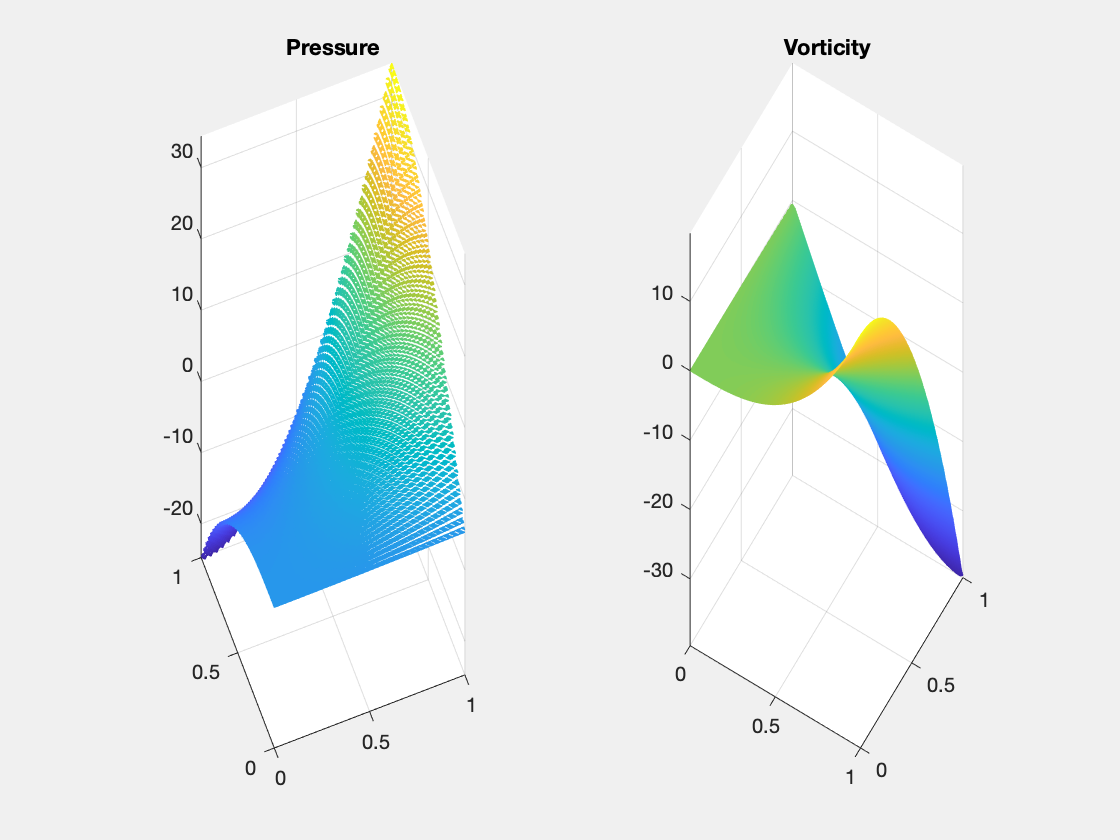

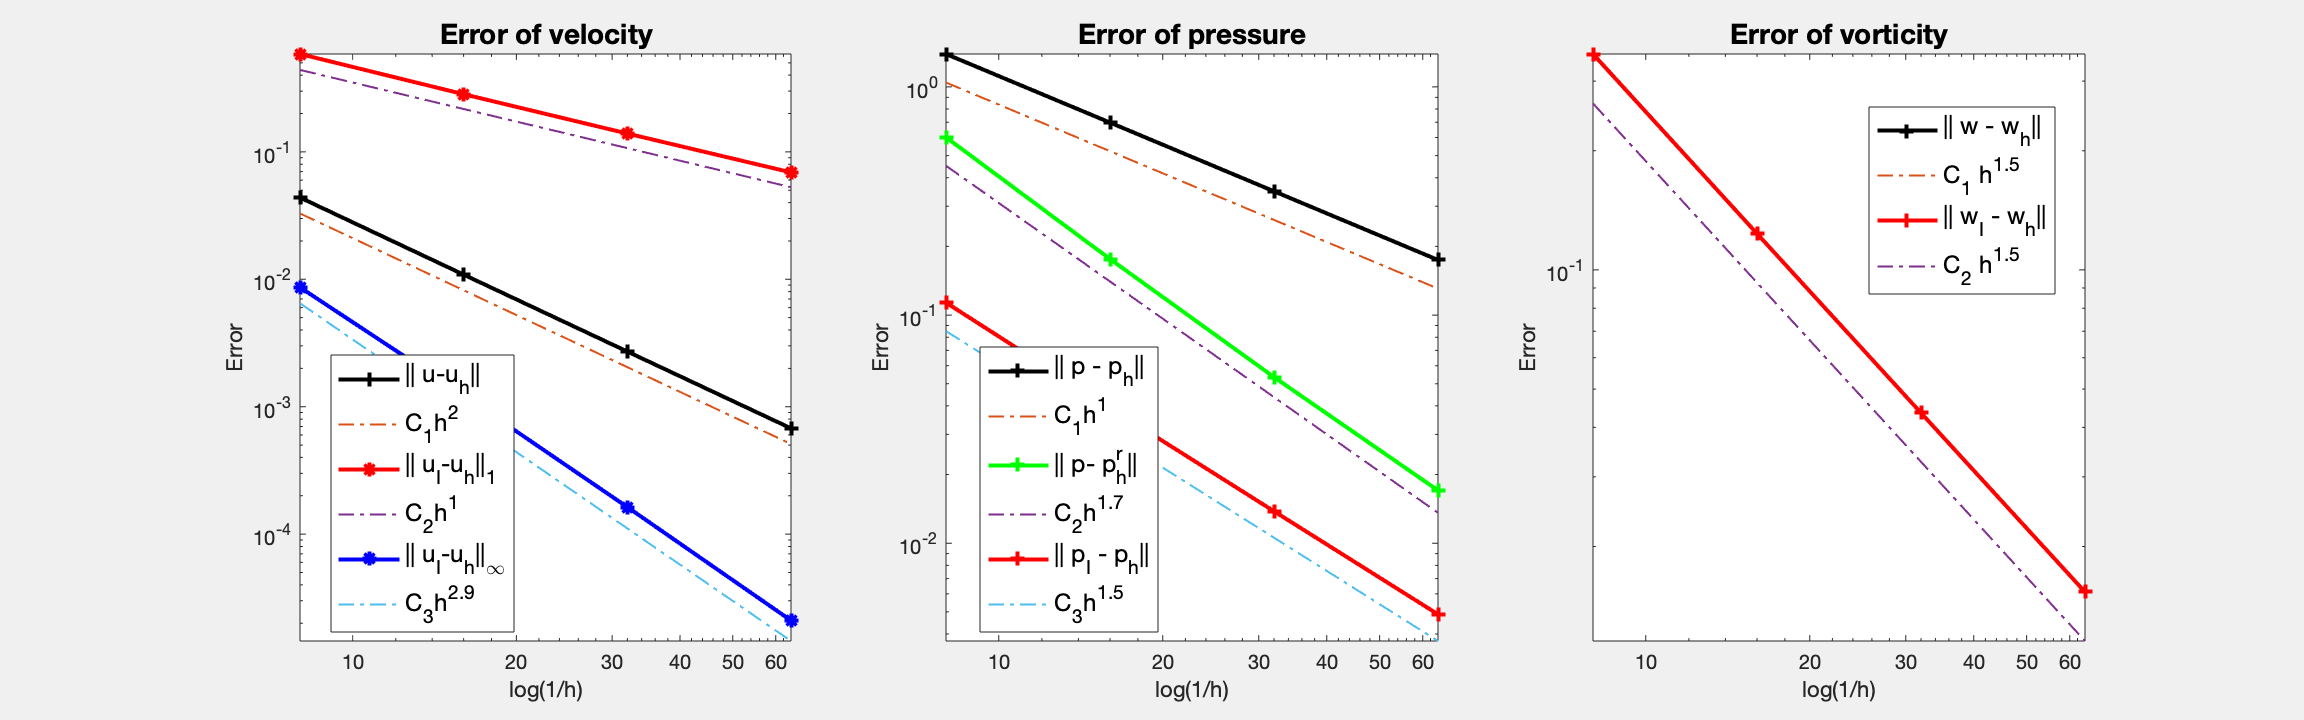

In [2]:
clear variables; 
close all;
imatlab_export_fig('print-png')  % Static png figures.
% setup
[node,elem] = squaremesh([0,1,0,1],0.5);
pde = Stokesdata1; % zero Dirichlet boundary condition
bdFlag = setboundary(node,elem,'Dirichlet');
mesh = struct('node',node,'elem',elem,'bdFlag',bdFlag);
% option
option.L0 = 1;
option.elemType = 'BDM1B-P0';
option.maxIt = 4;
option.solver = 'mg';
option.printlevel = 1;
option.refType = 'bisect';
option.viewanglep = [-21,88];
option.viewanglew = [31,88];
% fem
femStokesHdiv(mesh,pde,option);

When BDM element is used for velocity, the approximation is robust to the grid. Optimal order of velocity (1st order in H1 norm and 2nd in L2 norm) is observed. But for vorticity, the approximation order is only 1.5. The optimal order is 2 as quadratic element is used for vorticity. For pressure, optimal order is 1st and half order superconvergence between pI and ph. Based on that, a recovered pressure is 1.5 order. 

Compare [StokesRT0femrate](StokesRT0mfemrate.html) and the improvement is visiable especially no oscillation of vorticity near boundary. 

## Example 2: Unit square with regular grids

#dof:    608,  #nnz:  17994, level:  3  MG WCYCLE iter: 19,  err = 9.7521e-09,  time = 0.065 s
#dof:   2496,  #nnz:  80810, level:  4  MG WCYCLE iter: 20,  err = 9.1172e-09,  time = 0.12 s
#dof:  10112,  #nnz: 341610, level:  5  MG WCYCLE iter: 20,  err = 9.9028e-09,  time = 0.36 s
#dof:  40704,  #nnz: 1403882, level:  6  MG WCYCLE iter: 20,  err = 9.1152e-09,  time =  1.4 s
Table: Error
 #Dof       h     ||u_I-u_h||_1   ||u-u_h||   ||u_I-u_h||_{max}

  672   1.25e-01   4.26204e-01   5.31246e-02   4.48914e-03
 2624   6.25e-02   1.41350e-01   1.32599e-02   5.70612e-04
10368   3.12e-02   4.71926e-02   3.30840e-03   7.21484e-05
41216   1.56e-02   1.60608e-02   8.26063e-04   9.06249e-06

 #Dof       h      ||p_I-p_h||    ||p-p_h||   ||p_I-p_h||_{max}||p_I - p^r_h||

  672   1.25e-01   2.28403e-01   1.40760e+00   1.80392e+00   4.76828e-01
 2624   6.25e-02   7.05158e-02   7.00100e-01   9.57801e-01   1.37221e-01
10368   3.12e-02   2.22995e-02   3.49237e-01   4.91183e-01   4.10025e-02
41216   

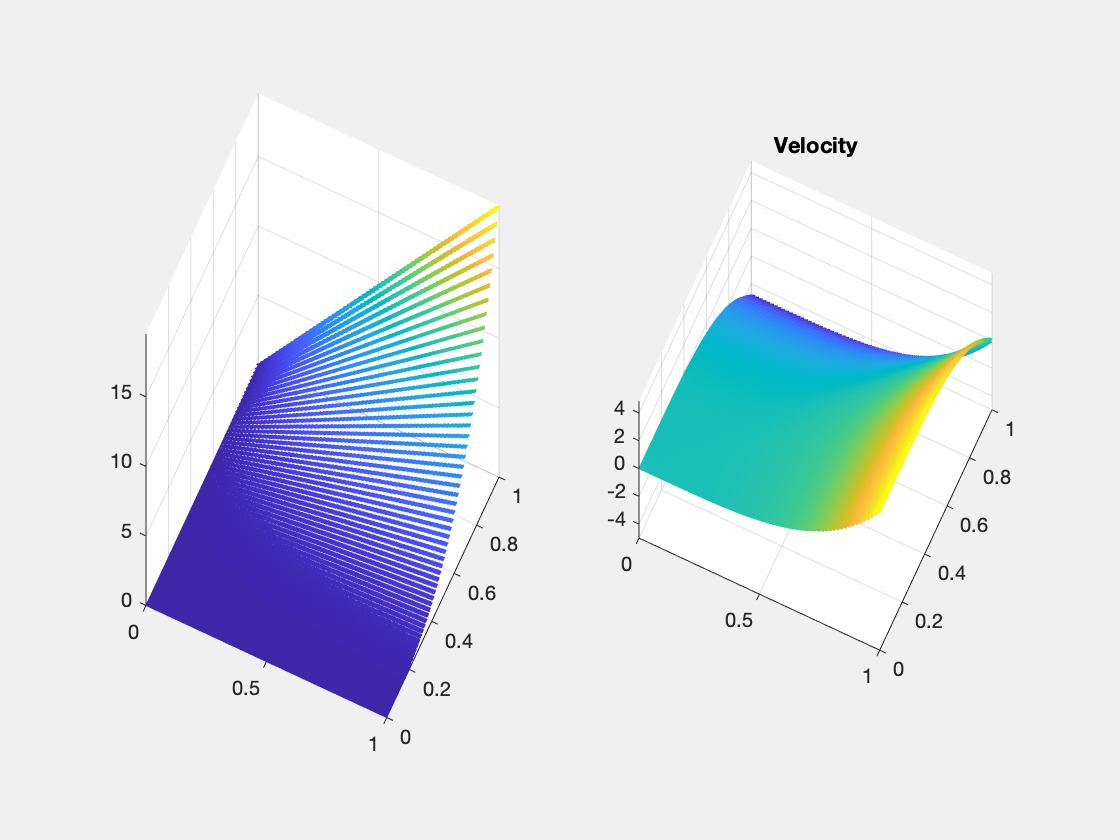

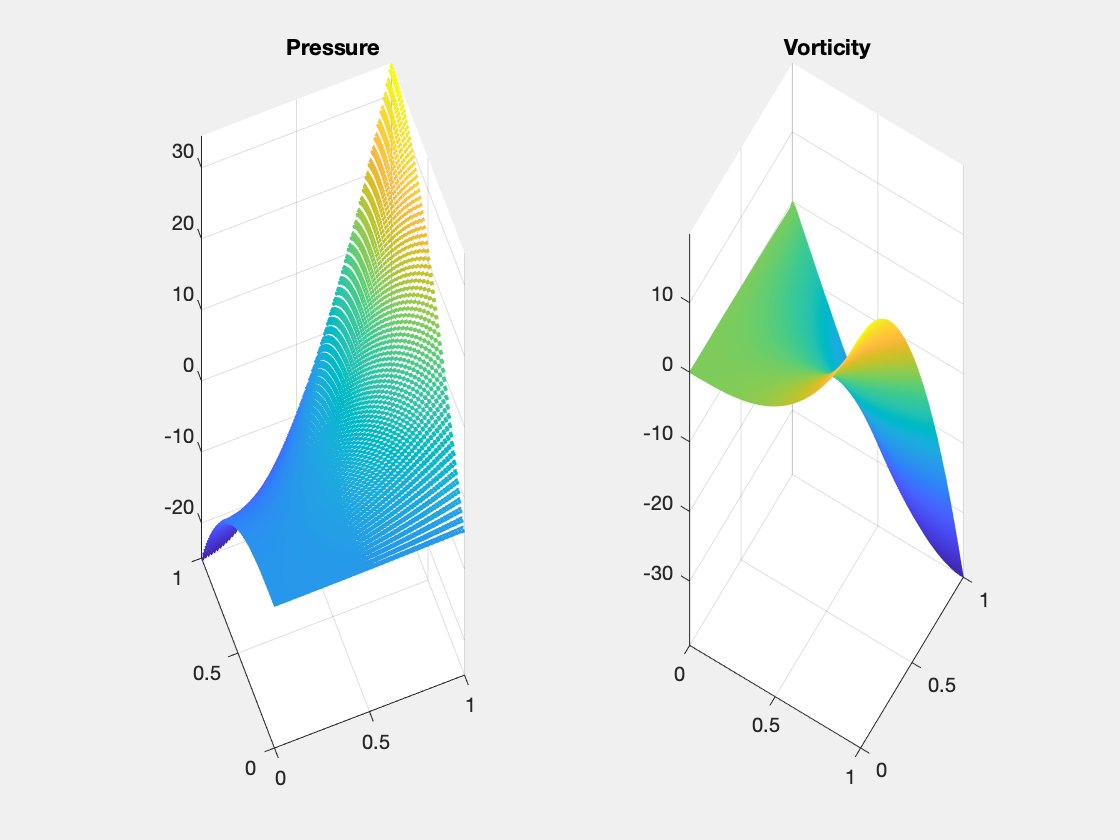

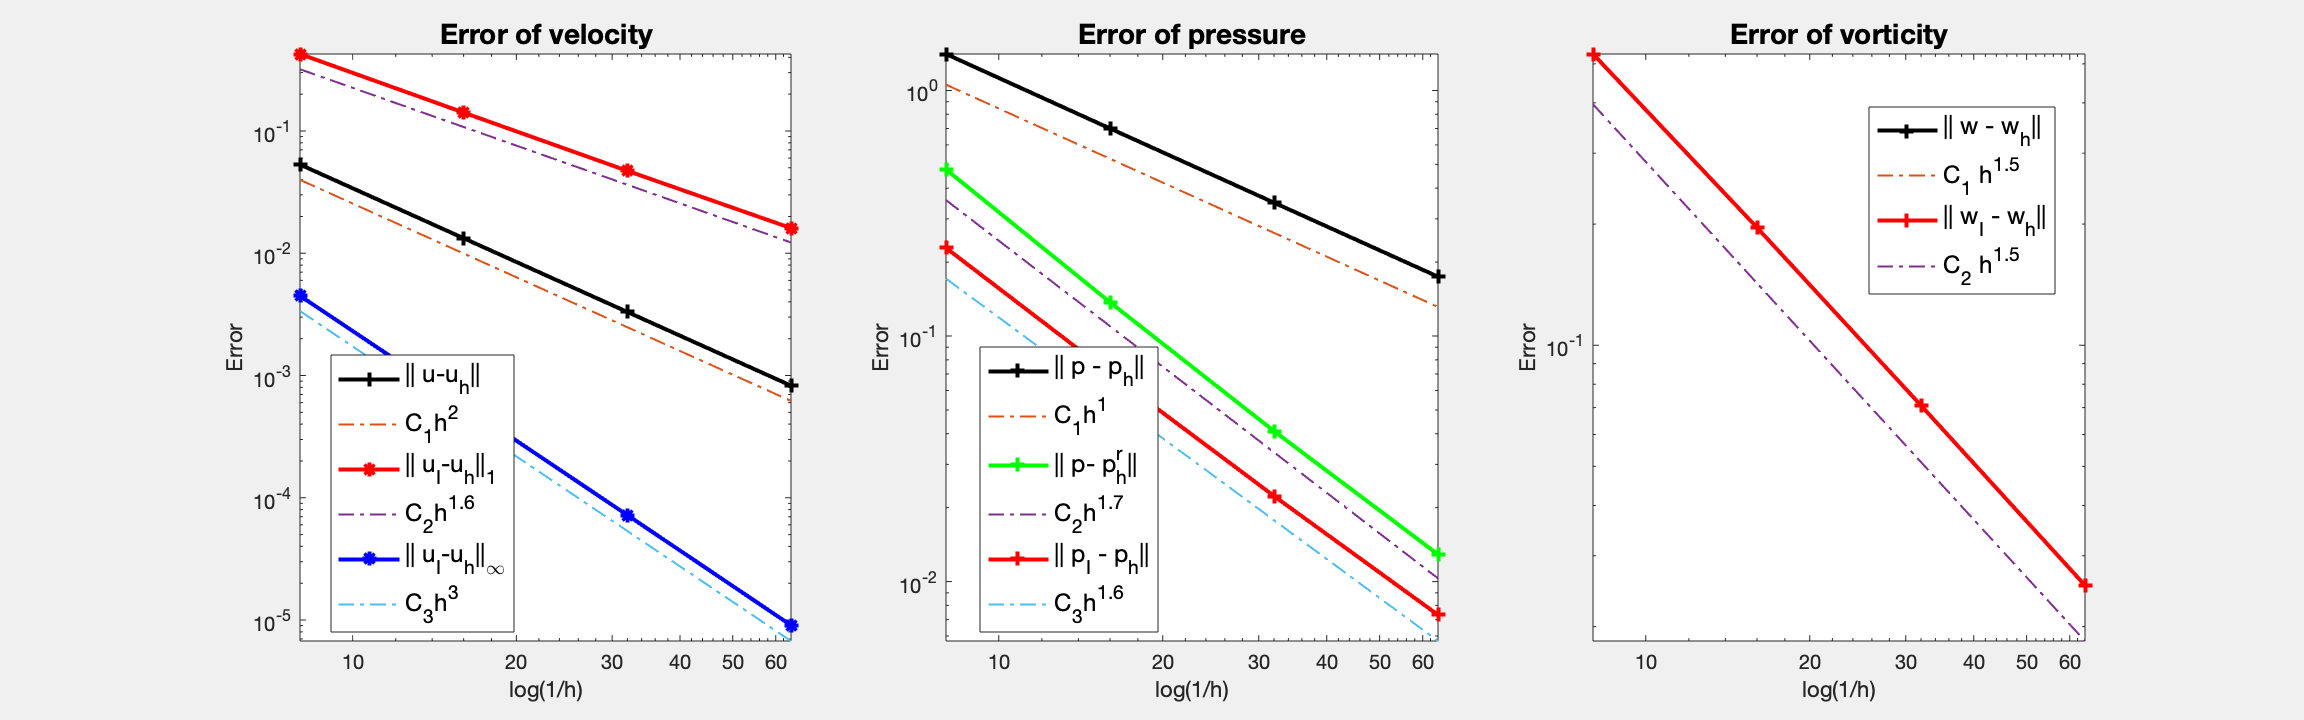

In [3]:
clear variables; 
close all;
% setup
[node,elem] = squaremesh([0,1,0,1],0.5);
pde = Stokesdata1;  % non-zero Dirichlet boundary condition
bdFlag = setboundary(node,elem,'Dirichlet');
mesh = struct('node',node,'elem',elem,'bdFlag',bdFlag);
% option
option.L0 = 1;
option.elemType = 'BDM1B-P0';
option.maxIt = 4;
option.solver = 'mg';
option.printlevel = 1;
option.refType = 'red';
option.viewanglep = [-21,88];
option.viewanglew = [31,88];
% fem
femStokesHdiv(mesh,pde,option);

The same seeting except the refinement rule is changed to the red refinement. No improvement is observed. 

## Conclusion

The rate of convergence of BDM1B-P0 is robust to the symmetry of the grids. For general unstructured grids, optimal first order convergence of velocity in H1 norm and for pressure in L2 norm is recovered. For vorticity  and for recovered velocity, the order is 1.5 for L2 norm.

Multigrid solver based on DGS smoother converges uniformly. 